In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as np
import numpy as np

from scipy.stats import chi2_contingency 
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder


In [4]:
train=pd.read_csv('Datasets/Train.csv')
test=pd.read_csv('datasets/test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
print(train.shape, test.shape)

(18506, 21) (6169, 20)


In [6]:
train.head(2)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz,cost_category
0,tour_id1hffseyw,ITALY,45-64,With Children,0.0,2.0,Visiting Friends and Relatives,Beach Tourism,"Friends, relatives",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost
1,tour_idnacd7zag,UNITED KINGDOM,25-44,With Spouse,1.0,1.0,Leisure and Holidays,Wildlife Tourism,"Travel agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,No,No,0,7,Yes,High Cost


In [7]:
test.head(2)

,Tour_ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,first_trip_tz
0,tour_idynufedne,KOREA,25-44,Alone,0.0,1.0,Leisure and Holidays,Widlife Tourism,Others,Independent,No,No,No,No,No,No,No,7,4,Yes
1,tour_id9r3y5moe,UNITED KINGDOM,45-64,With Children,1.0,1.0,Leisure and Holidays,Conference Tourism,"Travel agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,7,0,Yes


In [8]:
train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

In [10]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,18504.0,0.936230,1.215582,0.0,0.0,1.0,1.0,49.0
total_male,18500.0,0.998757,1.173177,0.0,1.0,1.0,1.0,58.0
night_mainland,18506.0,9.141576,14.127449,0.0,3.0,6.0,11.0,365.0
night_zanzibar,18506.0,2.493516,5.275156,0.0,0.0,0.0,4.0,240.0


In [11]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,6167.0,0.922491,1.173067,0.0,0.0,1.0,1.0,30.0
total_male,6168.0,1.017510,1.526274,0.0,1.0,1.0,1.0,90.0
night_mainland,6169.0,9.311720,16.366900,0.0,3.0,6.0,11.0,664.0
night_zanzibar,6169.0,2.585832,5.465058,0.0,0.0,0.0,4.0,174.0


In [12]:
train.isna().sum()

Tour_ID                     0
country                     0
age_group                   0
travel_with              1075
total_female                2
total_male                  6
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
first_trip_tz               0
cost_category               0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

def fillna(X, inplace=None):
    for col in X.columns:
        if col != 'cost_category' and X[col].isna().any():
            if X[col].dtype == 'object':
                strategy = 'most_frequent'
                pipe = make_pipeline(SimpleImputer(strategy=strategy))
            else:
                strategy= 'median'
                pipe = make_pipeline(SimpleImputer(strategy=strategy ))
            X[col] = pipe.fit_transform(X[[col]])
            
            if not inplace:
                return print("DataFrame not updated.")
            else:
                print(f"Missing Values in '{col}' column have been filled with the {strategy} value.")
                
    if inplace:
        return None

In [14]:
fillna(train, inplace=True)

Missing Values in 'travel_with' column have been filled with the most_frequent value.
Missing Values in 'total_female' column have been filled with the median value.
Missing Values in 'total_male' column have been filled with the median value.


In [15]:
fillna(test, inplace=True)

Missing Values in 'travel_with' column have been filled with the most_frequent value.
Missing Values in 'total_female' column have been filled with the median value.
Missing Values in 'total_male' column have been filled with the median value.


In [16]:
train.isnull().sum()

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
dtype: int64

In [17]:
test.isna().sum()

Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
dtype: int64

In [18]:
def check_unique(data):
    for col in data:
        print(col, len(data[col].unique()))

check_unique(train)

Tour_ID 18506
country 131
age_group 5
travel_with 5
total_female 24
total_male 24
purpose 8
main_activity 10
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
night_mainland 110
night_zanzibar 60
first_trip_tz 2
cost_category 6


In [19]:
check_unique(test)

Tour_ID 6169
country 118
age_group 5
travel_with 5
total_female 19
total_male 18
purpose 8
main_activity 10
info_source 8
tour_arrangement 2
package_transport_int 2
package_accomodation 2
package_food 2
package_transport_tz 2
package_sightseeing 2
package_guided_tour 2
package_insurance 2
night_mainland 91
night_zanzibar 44
first_trip_tz 2


In [20]:
def cat_unique(dataset):
    for col in dataset.select_dtypes('object', 'category'):
        if dataset[col].nunique() > 10:
            print(f"\nColumn: {col}\nTotal number of Unique Values:  {dataset[col].nunique()}")
        else:
            print(f"\nColumn: {col}\nUnique Values: {dataset[col].unique()}")

In [21]:
cat_unique(train)


Column: Tour_ID
Total number of Unique Values:  18506

Column: country
Total number of Unique Values:  131

Column: age_group
Unique Values: ['45-64' '25-44' '65+' '18-24' '<18']

Column: travel_with
Unique Values: ['With Children' 'With Spouse' 'With Spouse and Children' 'Alone'
 'With Other Friends/Relatives']

Column: purpose
Unique Values: ['Visiting Friends and Relatives' 'Leisure and Holidays' 'Business'
 'Scientific and Academic' 'Meetings and Conference' 'Volunteering'
 'Other' 'Medical']

Column: main_activity
Unique Values: ['Beach Tourism' 'Wildlife Tourism' 'Widlife Tourism' 'Cultural Tourism'
 'Bird Tourism' 'Hunting Tourism' 'Conference Tourism' 'Mountain Climbing'
 'Business' 'Diving and Sport Fishing']

Column: info_source
Unique Values: ['Friends, relatives' 'Travel agent, tour operator' 'Radio, TV, Web'
 'Newspaper, magazines, brochures' 'Others' 'Tanzania Mission Abroad'
 'Inflight magazines' 'Trade fair']

Column: tour_arrangement
Unique Values: ['Package Tour' 'In

In [22]:
train['main_activity'].replace({'Widlife Tourism':'Wildlife Tourism'}, inplace=True)
train['age_group'].replace({'<18':'0-18', '65+': '65-100'}, inplace=True)

In [23]:
train.age_group.value_counts()

25-44     9047
45-64     5648
18-24     2222
65-100    1467
0-18       122
Name: age_group, dtype: int64

In [24]:
train.main_activity.value_counts()

Wildlife Tourism            8271
Beach Tourism               4172
Conference Tourism          1920
Hunting Tourism             1712
Cultural Tourism            1444
Mountain Climbing            529
Business                     280
Bird Tourism                 144
Diving and Sport Fishing      34
Name: main_activity, dtype: int64

In [25]:
def chi_test(X, y):
    col_drop= []
    not_drop= []
    undecided=[]
    
    for col in X.columns:
        ct=pd.crosstab(y, X[col])
        chi2, p, dof, expected = chi2_contingency(ct)
        
        if p >= 0.05 or chi2 <= 2000:
            col_drop.append(col)
        elif p <0.05 and  chi2 >= 5000:
            not_drop.append(col)
        else:
            undecided.append(col)
        
        print(f"Column: {col}\nChi Test: {chi2}\nP_Value: {p}\nDOF: {dof}\n------------")
    print(f"\n\nSUMMARY: \nLittle or No correlation Columns: {col_drop}\n\nStrong Correlation Columns: {not_drop}\n\nCorrelation not so strong columns: {undecided}")

In [26]:
X=train.drop('cost_category', axis=1)
y=train['cost_category']

In [27]:
chi_test(X, y)

<IPython.core.display.Javascript object>

Column: Tour_ID
Chi Test: 92530.0
P_Value: 0.4947449902995666
DOF: 92525
------------


<IPython.core.display.Javascript object>

Column: country
Chi Test: 9779.033678192025
P_Value: 0.0
DOF: 650
------------


<IPython.core.display.Javascript object>

Column: age_group
Chi Test: 1803.1964576488913
P_Value: 0.0
DOF: 20
------------


<IPython.core.display.Javascript object>

Column: travel_with
Chi Test: 4750.174328498706
P_Value: 0.0
DOF: 20
------------


<IPython.core.display.Javascript object>

Column: total_female
Chi Test: 3730.2094106443064
P_Value: 0.0
DOF: 115
------------


<IPython.core.display.Javascript object>

Column: total_male
Chi Test: 1398.489543210294
P_Value: 2.2443121745916526e-219
DOF: 115
------------


<IPython.core.display.Javascript object>

Column: purpose
Chi Test: 6975.312873617305
P_Value: 0.0
DOF: 35
------------


<IPython.core.display.Javascript object>

Column: main_activity
Chi Test: 3606.50524881434
P_Value: 0.0
DOF: 40
------------


<IPython.core.display.Javascript object>

Column: info_source
Chi Test: 4166.3943611855575
P_Value: 0.0
DOF: 35
------------


<IPython.core.display.Javascript object>

Column: tour_arrangement
Chi Test: 8331.284428771029
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_transport_int
Chi Test: 5414.9841247089
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_accomodation
Chi Test: 7883.608233888307
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_food
Chi Test: 7146.769578021885
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_transport_tz
Chi Test: 6346.490489845604
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_sightseeing
Chi Test: 4501.574863783683
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_guided_tour
Chi Test: 4873.499054202309
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_insurance
Chi Test: 2067.872038967938
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: night_mainland
Chi Test: 5614.015301227679
P_Value: 0.0
DOF: 545
------------


<IPython.core.display.Javascript object>

Column: night_zanzibar
Chi Test: 2652.1882265219597
P_Value: 0.0
DOF: 295
------------


<IPython.core.display.Javascript object>

Column: first_trip_tz
Chi Test: 2229.180451768042
P_Value: 0.0
DOF: 5
------------


SUMMARY: 
Little or No correlation Columns: ['Tour_ID', 'age_group', 'total_male']

Strong Correlation Columns: ['country', 'purpose', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'night_mainland']

Correlation not so strong columns: ['travel_with', 'total_female', 'main_activity', 'info_source', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'night_zanzibar', 'first_trip_tz']


In [36]:
country_feature=train.groupby(by=['country']).count().reset_index()[['country']]


def hash_function(row):
    return(sklearn.utils.murmurhash3_32(row.country))

country_feature["country_hash"] = country_feature.apply(hash_function, axis=1)
country_feature.tail()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

       country  country_hash
126  VENEZUELA      47797206
127    VIETNAM    1795279164
128      YEMEN    -322353758
129     ZAMBIA     830408913
130   ZIMBABWE     655778258


In [37]:
n_features = 13

def mod_function(row):
    return(abs(row.country_hash) % n_features)

country_feature["country_hash_mod"] = country_feature.apply(mod_function, axis=1)
country_feature.tail(10)

,country,country_hash,country_hash_mod
121,UKRAIN,76637994,4
122,UNITED ARAB EMIRATES,-1866793011,5
123,UNITED KINGDOM,1582916261,4
124,UNITED STATES OF AMERICA,101392980,0
125,URUGUAY,-1342564520,11
126,VENEZUELA,47797206,2
127,VIETNAM,1795279164,3
128,YEMEN,-322353758,12
129,ZAMBIA,830408913,9
130,ZIMBABWE,655778258,5


In [46]:
new=pd.concat(objs=[X, country_feature.drop('country', axis=1)], axis=1)

<IPython.core.display.Javascript object>

In [47]:
new.duplicated().sum()

0

In [48]:
new.columns

Index(['Tour_ID', 'country', 'age_group', 'travel_with', 'total_female',
       'total_male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'first_trip_tz', 'country_hash', 'country_hash_mod'],
      dtype='object')

In [49]:
chi_test(new, y)

<IPython.core.display.Javascript object>

Column: Tour_ID
Chi Test: 92530.0
P_Value: 0.4947449902995666
DOF: 92525
------------


<IPython.core.display.Javascript object>

Column: country
Chi Test: 9779.033678192025
P_Value: 0.0
DOF: 650
------------


<IPython.core.display.Javascript object>

Column: age_group
Chi Test: 1803.1964576488913
P_Value: 0.0
DOF: 20
------------


<IPython.core.display.Javascript object>

Column: travel_with
Chi Test: 4750.174328498706
P_Value: 0.0
DOF: 20
------------


<IPython.core.display.Javascript object>

Column: total_female
Chi Test: 3730.2094106443064
P_Value: 0.0
DOF: 115
------------


<IPython.core.display.Javascript object>

Column: total_male
Chi Test: 1398.489543210294
P_Value: 2.2443121745916526e-219
DOF: 115
------------


<IPython.core.display.Javascript object>

Column: purpose
Chi Test: 6975.312873617305
P_Value: 0.0
DOF: 35
------------


<IPython.core.display.Javascript object>

Column: main_activity
Chi Test: 3606.50524881434
P_Value: 0.0
DOF: 40
------------


<IPython.core.display.Javascript object>

Column: info_source
Chi Test: 4166.3943611855575
P_Value: 0.0
DOF: 35
------------


<IPython.core.display.Javascript object>

Column: tour_arrangement
Chi Test: 8331.284428771029
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_transport_int
Chi Test: 5414.9841247089
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_accomodation
Chi Test: 7883.608233888307
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_food
Chi Test: 7146.769578021885
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_transport_tz
Chi Test: 6346.490489845604
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_sightseeing
Chi Test: 4501.574863783683
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_guided_tour
Chi Test: 4873.499054202309
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_insurance
Chi Test: 2067.872038967938
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: night_mainland
Chi Test: 5614.015301227679
P_Value: 0.0
DOF: 545
------------


<IPython.core.display.Javascript object>

Column: night_zanzibar
Chi Test: 2652.1882265219597
P_Value: 0.0
DOF: 295
------------


<IPython.core.display.Javascript object>

Column: first_trip_tz
Chi Test: 2229.180451768042
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: country_hash
Chi Test: 655.0
P_Value: 0.43770099488619535
DOF: 650
------------


<IPython.core.display.Javascript object>

Column: country_hash_mod
Chi Test: 67.23328024290723
P_Value: 0.24327326973752444
DOF: 60
------------


SUMMARY: 
Little or No correlation Columns: ['Tour_ID', 'age_group', 'total_male', 'country_hash', 'country_hash_mod']

Strong Correlation Columns: ['country', 'purpose', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'night_mainland']

Correlation not so strong columns: ['travel_with', 'total_female', 'main_activity', 'info_source', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'night_zanzibar', 'first_trip_tz']


In [107]:
def showDetails(df):
    for col in df.select_dtypes('object', 'category'):
        if df[col].nunique() >= 10 :
            print(f"{col} : Unique Values are many.")
        else: 
            print('------------------------------------------')
            print(col )#+' & Cost Category')
            print(df[col].value_counts())
            #tempDict = dict(df[col][df['cost_category'] == 'Normal Cost'].value_counts())
            #for i in tempDict.keys():
              #  tempDict[i] = (tempDict[i]/len(df[df[col] == i]))*100
            #print(tempDict)
            print('------------------------------------------')

In [108]:
showDetails(train)

Tour_ID : Unique Values are many.
country : Unique Values are many.
------------------------------------------
age_group
25-44     9047
45-64     5648
18-24     2222
65-100    1467
0-18       122
Name: age_group, dtype: int64
------------------------------------------
------------------------------------------
travel_with
Alone                           8665
With Spouse                     4842
With Other Friends/Relatives    3268
With Spouse and Children        1193
With Children                    538
Name: travel_with, dtype: int64
------------------------------------------
------------------------------------------
purpose
Leisure and Holidays              11755
Visiting Friends and Relatives     2304
Business                           2297
Meetings and Conference            1179
Volunteering                        438
Other                               326
Scientific and Academic             198
Medical                               9
Name: purpose, dtype: int64
-----------------

In [109]:
train['total_people']=train['total_male'] + train['total_female']
train['total_nights']=train['night_zanzibar']+train['night_mainland']
train['average_stay']= (train['total_people'] / train['total_nights']).round(2)
#train['']

In [110]:
X=train.drop('cost_category', axis=1)
y= train['cost_category']

In [111]:
chi_test(X,y)

<IPython.core.display.Javascript object>

Column: Tour_ID
Chi Test: 92530.0
P_Value: 0.4947449902995666
DOF: 92525
------------


<IPython.core.display.Javascript object>

Column: country
Chi Test: 9779.033678192025
P_Value: 0.0
DOF: 650
------------


<IPython.core.display.Javascript object>

Column: age_group
Chi Test: 1803.1964576488913
P_Value: 0.0
DOF: 20
------------


<IPython.core.display.Javascript object>

Column: travel_with
Chi Test: 4750.174328498706
P_Value: 0.0
DOF: 20
------------


<IPython.core.display.Javascript object>

Column: total_female
Chi Test: 3730.2094106443064
P_Value: 0.0
DOF: 115
------------


<IPython.core.display.Javascript object>

Column: total_male
Chi Test: 1398.489543210294
P_Value: 2.2443121745916526e-219
DOF: 115
------------


<IPython.core.display.Javascript object>

Column: purpose
Chi Test: 6975.312873617305
P_Value: 0.0
DOF: 35
------------


<IPython.core.display.Javascript object>

Column: main_activity
Chi Test: 3606.50524881434
P_Value: 0.0
DOF: 40
------------


<IPython.core.display.Javascript object>

Column: info_source
Chi Test: 4166.3943611855575
P_Value: 0.0
DOF: 35
------------


<IPython.core.display.Javascript object>

Column: tour_arrangement
Chi Test: 8331.284428771029
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_transport_int
Chi Test: 5414.9841247089
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_accomodation
Chi Test: 7883.608233888307
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_food
Chi Test: 7146.769578021885
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_transport_tz
Chi Test: 6346.490489845604
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_sightseeing
Chi Test: 4501.574863783683
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_guided_tour
Chi Test: 4873.499054202309
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: package_insurance
Chi Test: 2067.872038967938
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: night_mainland
Chi Test: 5614.015301227679
P_Value: 0.0
DOF: 545
------------


<IPython.core.display.Javascript object>

Column: night_zanzibar
Chi Test: 2652.1882265219597
P_Value: 0.0
DOF: 295
------------


<IPython.core.display.Javascript object>

Column: first_trip_tz
Chi Test: 2229.180451768042
P_Value: 0.0
DOF: 5
------------


<IPython.core.display.Javascript object>

Column: total_people
Chi Test: 5215.068302689404
P_Value: 0.0
DOF: 155
------------


<IPython.core.display.Javascript object>

Column: total_nights
Chi Test: 6523.200295117052
P_Value: 0.0
DOF: 580
------------


<IPython.core.display.Javascript object>

Column: average_stay
Chi Test: 7294.838819160822
P_Value: 0.0
DOF: 750
------------


SUMMARY: 
Little or No correlation Columns: ['Tour_ID', 'age_group', 'total_male']

Strong Correlation Columns: ['country', 'purpose', 'tour_arrangement', 'package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz', 'night_mainland', 'total_people', 'total_nights', 'average_stay']

Correlation not so strong columns: ['travel_with', 'total_female', 'main_activity', 'info_source', 'package_sightseeing', 'package_guided_tour', 'package_insurance', 'night_zanzibar', 'first_trip_tz']


<Axes: >

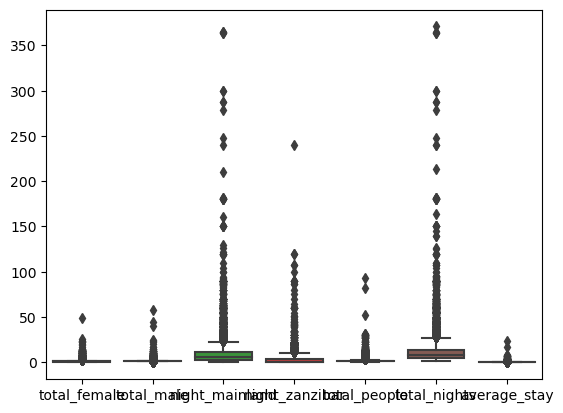

In [159]:
sns.boxplot(data=X)

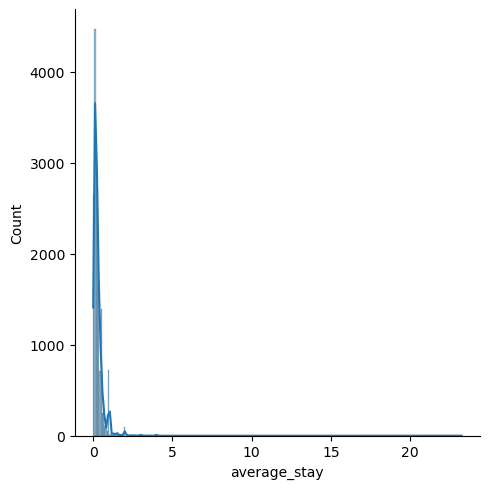

In [162]:
sns.displot(train['average_stay'], bins=300, kde=True);

In [163]:
def check_outliers(data, factor:int, strategy='mean', inplace=True):
    for col in data.select_dtypes(include=['int64', 'float64']).columns:
        lower_qtl = data[col].quantile(0.25)
        upper_qtl=data[col].quantile(0.75)
        iqr=(upper_qtl-lower_qtl)
        u_bound= upper_qtl + factor * iqr
        l_bound= lower_qtl - factor * iqr
        
        outliers=[]
        for x in data[col]:
            if ((x > u_bound) or (x  < l_bound)):
                outliers.append(x)
                
        if strategy == 'mean':
            replacement = data[col].mean()
        elif strategy == 'median':
            replacement = data[col].median()
        elif strategy == 'mode':
            replacement = data[col].mode()[0]
            
        for idx in outliers:
            data.loc[idx,col]=replacement 
        
        print(f"\n\nColumn: {col}\nLower_Bound: {l_bound}\nUpper_Bound: {u_bound}\nOutliers: {outliers}")
    
    print(f"\n\n\nOutliers Succesfully replaced with {strategy}.")

In [164]:
%%time
X=check_outliers(X,factor=3, strategy='median', inplace=True)



Column: total_female
Lower_Bound: -3.0
Upper_Bound: 4.0
Outliers: [49.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 7.0, 10.0, 5.0, 13.0, 5.0, 6.0, 6.0, 14.0, 8.0, 5.0, 6.0, 15.0, 6.0, 10.0, 7.0, 13.0, 6.0, 5.0, 6.0, 10.0, 10.0, 5.0, 5.0, 5.0, 6.0, 20.0, 6.0, 7.0, 8.0, 17.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 14.0, 10.0, 7.0, 10.0, 6.0, 5.0, 6.0, 6.0, 5.0, 5.0, 5.0, 6.0, 14.0, 6.0, 11.0, 5.0, 5.0, 6.0, 6.0, 5.0, 8.0, 12.0, 6.0, 6.0, 6.0, 6.0, 11.0, 6.0, 5.0, 12.0, 6.0, 8.0, 5.0, 6.0, 24.0, 6.0, 7.0, 6.0, 9.0, 12.0, 10.0, 6.0, 6.0, 5.0, 5.0, 5.0, 14.0, 6.0, 6.0, 6.0, 5.0, 9.0, 5.0, 10.0, 11.0, 5.0, 22.0, 7.0, 7.0, 7.0, 12.0, 11.0, 5.0, 7.0, 6.0, 10.0, 5.0, 5.0, 5.0, 6.0, 5.0, 12.0, 6.0, 6.0, 5.0, 8.0, 6.0, 8.0, 8.0, 6.0, 5.0, 8.0, 26.0, 5.0, 5.0, 6.0, 5.0, 7.0, 8.0, 11.0, 10.0, 5.0, 5.0, 5.0, 6.0, 5.0, 11.0, 8.0, 7.0, 8.0, 5.0, 14.0, 8.0, 9.0, 19.0, 5.0, 5.0, 12.0, 6.0, 7.0, 6.0, 5.0, 5.0, 23.0, 5.0, 5.0, 5.0, 6.0, 9.0, 5.0, 9.0, 13.0, 7.0, 5.0, 6.0, 7.0, 10.0, 12.0, 9.0, 5.0, 5.0, 5.0, 5.0, 5.0, 6.0, 

In [166]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
total_female,18506.0,0.936237,1.215516,0.0,0.00,1.0,1.00,49.00
total_male,18506.0,0.998757,1.172986,0.0,1.00,1.0,1.00,58.00
night_mainland,18506.0,9.141576,14.127449,0.0,3.00,6.0,11.00,365.00
night_zanzibar,18506.0,2.493516,5.275156,0.0,0.00,0.0,4.00,240.00
total_people,18506.0,1.934994,2.009311,0.0,1.00,2.0,2.00,93.00
total_nights,18506.0,11.635091,14.589660,1.0,5.00,8.0,14.00,371.00
average_stay,18506.0,0.301043,0.425775,0.0,0.11,0.2,0.33,23.25


In [46]:
X

In [ ]:
chi_test(X, y)

In [157]:
train['age_group']=train['age_group'].rename({'<18': '0-18',
                                      '65+': '65-100'})

In [158]:
train.age_group.max()

'<18'

In [159]:
train.age_group.value_counts()

25-44    9047
45-64    5648
18-24    2222
65+      1467
<18       122
Name: age_group, dtype: int64

In [148]:
X.age_group.min()

'18-24'

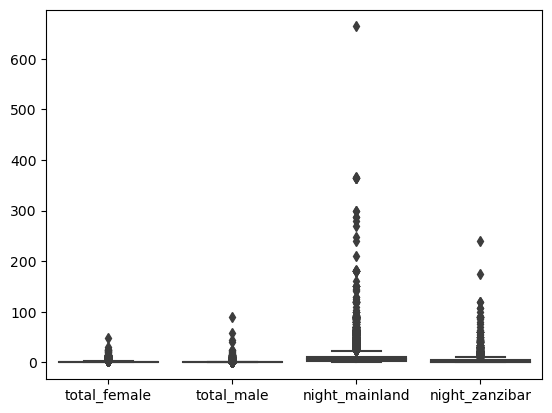

In [137]:
sns.boxplot(data=full);

In [33]:
full.quantile(0.75)

total_female       1.0
total_male         1.0
night_mainland    11.0
night_zanzibar     4.0
Name: 0.75, dtype: float64

In [34]:
full.dtypes

Tour_ID                   object
country                   object
age_group                 object
travel_with               object
total_female             float64
total_male               float64
purpose                   object
main_activity             object
info_source               object
tour_arrangement          object
package_transport_int     object
package_accomodation      object
package_food              object
package_transport_tz      object
package_sightseeing       object
package_guided_tour       object
package_insurance         object
night_mainland             int64
night_zanzibar             int64
first_trip_tz             object
cost_category             object
dtype: object

In [35]:
X.night_zanzibar.value_counts().sort_values(ascending=False)

0     15431
7      2043
4      1357
3      1241
5      1087
      ...  
56        1
31        1
86        1
80        1
47        1
Name: night_zanzibar, Length: 65, dtype: int64